# 운동1(푸쉬업) 모델 학습

In [16]:
import json
import numpy as np

keypoints = [
    "Point_0", "Point_7", "Point_8", "Point_11", "Point_12", "Point_13",
    "Point_14", "Point_15", "Point_16", "Point_17", "Point_18", "Point_21",
    "Point_22","Point_23", "Point_24", "Point_25", "Point_26", "Point_27",
    "Point_28", "Point_29", "Point_30"
]


# JSON 데이터 로드 함수
def load_json_skeleton_view1(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    num_frames = len(data["frames"])
    num_joints = len(keypoints)
    num_features = 2  # (x, y)
    num_views = 1     

    # ✅ (1, 프레임, 뷰, 관절, 좌표) 형태로 데이터 배열 생성
    X_data = np.zeros((1, num_frames, num_views, num_joints, num_features), dtype=np.float32)

    views = ["view3"]

    # ✅ JSON 데이터 -> 배열 변환
    for frame_idx, frame in enumerate(data["frames"]):
        for view_idx, view in enumerate(views):
            pts = frame.get(view, {}).get("pts", {})
            for joint_idx, joint_name in enumerate(keypoints):
                if joint_name in pts:
                    X_data[0, frame_idx, view_idx, joint_idx, 0] = pts[joint_name]["x"]
                    X_data[0, frame_idx, view_idx, joint_idx, 1] = pts[joint_name]["y"]

    return X_data, data.get("type_info", None)

In [17]:
# ✅ JSON 데이터 로드 함수 (5개 각도 전처리)
def load_json_skeleton(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    num_frames = len(data["frames"])
    num_joints = len(keypoints)
    num_features = 2  # (x, y)
    num_views = 1

    # ✅ (1, 프레임, 뷰, 관절, 좌표) 형태로 데이터 배열 생성
    X_data = np.zeros((1, num_frames, num_views, num_joints, num_features), dtype=np.float32)

    views = ["view3"]

    # ✅ JSON 데이터 -> 배열 변환
    for frame_idx, frame in enumerate(data["frames"]):
        for view_idx, view in enumerate(views):
            pts = frame.get(view, {}).get("pts", {})
            for joint_idx, joint_name in enumerate(keypoints):
                if joint_name in pts:
                    X_data[0, frame_idx, view_idx, joint_idx, 0] = pts[joint_name]["x"]
                    X_data[0, frame_idx, view_idx, joint_idx, 1] = pts[joint_name]["y"]

    return X_data, data.get("type_info", None)

# ✅ 여러 개의 JSON 파일을 한 번에 로드하는 함수 (올바른/잘못된 데이터 포함)
def load_labeled_json_skeleton(file_paths, labels):
    X_data_list = []
    y_data_list = []

    for file_path, label in zip(file_paths, labels):
        X, _ = load_json_skeleton(file_path)
        X_data_list.append(X)
        y_data_list.append(label)

    # ✅ 여러 개의 파일을 하나의 NumPy 배열로 병합
    X_train = np.concatenate(X_data_list, axis=0)  # (batch_size, frames, views, joints, features)
    y_train = np.array(y_data_list)                # (batch_size, )

    return X_train, y_train
    
# ✅ 올바른 자세와 잘못된 자세 데이터를 함께 로드
file_paths = [
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body10-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body10-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body10-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body10-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body10-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body10-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body10-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body11-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body11-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body11-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body11-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body11-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body11-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body11-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body12-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body12-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body12-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body12-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body12-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body12-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body12-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body17-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body17-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body17-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body17-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body17-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-562.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-563.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-564.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-565.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-566.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-567.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-568.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-569.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-570.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-571.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-572.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-573.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-574.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-575.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-576.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-577.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-578.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-579.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-580.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-581.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-582.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-583.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-584.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-585.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-586.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-587.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-588.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-589.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-590.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-591.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body09-1-592.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-562.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-563.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-564.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-565.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-566.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-567.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-568.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-569.json",
    "D:/Studying/gradu/013.피트니스자세/1.Training/gradu/16/body08-1-570.json",
]

labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # 0 = 올바른 자세, 1 = 잘못된 자세
    
# ✅ 올바른 자세와 잘못된 자세 데이터를 함께 로드
file_paths_val = [
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-562.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-563.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-564.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-565.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-566.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-567.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-568.json",
]

labels_val = [0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1]  # 0 = 올바른 자세, 1 = 잘못된 자세


# ✅ 전처리 실행
X_train, y_train = load_labeled_json_skeleton(file_paths, labels)
X_val, y_val = load_labeled_json_skeleton(file_paths_val, labels_val)
# ✅ 전처리된 데이터 형태 확인
print("전처리된 데이터 Shape:", X_train.shape)
print("전처리된 데이터 Shape:", X_val.shape)

전처리된 데이터 Shape: (80, 16, 1, 21, 2)
전처리된 데이터 Shape: (14, 16, 1, 21, 2)


In [18]:
import tensorflow as tf
from tensorflow.keras import layers
import mediapipe as mp
from tensorflow.keras.callbacks import EarlyStopping

def jitter_data(data, noise_level=0.01):
    noise = np.random.normal(loc=0.0, scale=noise_level, size=data.shape)
    return data + noise

# ✅ Scaling (데이터 크기 변형)
def scale_data(data, scale_range=(0.9, 1.1)):
    scale = np.random.uniform(scale_range[0], scale_range[1], size=(data.shape[0], 1, 1, 1, 1))
    return data * scale  # ✅ 차원을 맞춰서 곱하기!

def rotate_skeleton(data, angle_range=(-5, 5)):
    angle = np.random.uniform(angle_range[0], angle_range[1]) * np.pi / 180  # 라디안 변환
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    return np.dot(data, rotation_matrix)

# ✅ 인접 행렬 정규화 함수: self-loop 추가 및 D^(-1/2) A D^(-1/2) 적용
def normalize_adjacency_matrix(adj):
    # 자기 루프 추가
    np.fill_diagonal(adj, 1)
    # Degree matrix 계산
    degree = np.sum(adj, axis=1)
    # 0 나누기 방지
    degree[degree == 0] = 1
    D_inv_sqrt = np.diag(1.0 / np.sqrt(degree))
    # 정규화된 인접 행렬 계산: D^(-1/2) A D^(-1/2)
    A_norm = D_inv_sqrt @ adj @ D_inv_sqrt
    return A_norm
    
# ✅ 그래프 컨볼루션 레이어 정의
class GraphConvLayer(layers.Layer):
    def __init__(self, units, adjacency_matrix):
        super(GraphConvLayer, self).__init__()
        self.units = units
        self.adjacency_matrix = tf.Variable(adjacency_matrix, dtype=tf.float32, trainable=False)
        self.batch_norm = layers.BatchNormalization()  # 배치 정규화 추가

    def build(self, input_shape):
        # input_shape: (batch*frames, joints, features)
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="glorot_uniform",
            trainable=True
        )

    def call(self, inputs):
        # inputs: (batch*frames, joints, features)
        x = tf.linalg.matmul(self.adjacency_matrix, inputs)  # Graph convolution
        x = tf.linalg.matmul(x, self.kernel)  # Apply learnable weights
        x = self.batch_norm(x)  # Batch normalization
        x = tf.nn.leaky_relu(x)  # Activation function applied AFTER batch norm
        return x

# ✅ ST-GCN 모델 정의
@tf.keras.utils.register_keras_serializable()
class STGCN(tf.keras.Model):
    def __init__(self, num_joints, num_features, adjacency_matrix, num_classes, **kwargs):
        super(STGCN, self).__init__(**kwargs)

        self.num_joints = num_joints
        self.num_features = num_features
        self.num_classes = num_classes
        self.adjacency_matrix = tf.convert_to_tensor(adjacency_matrix, dtype=tf.float32)  # 텐서로 변환
        
        self.graph_conv1 = GraphConvLayer(64, adjacency_matrix)
        self.graph_conv2 = GraphConvLayer(128, adjacency_matrix)
        self.graph_conv3 = GraphConvLayer(256, adjacency_matrix)  # 추가된 Graph Conv
        self.graph_conv4 = GraphConvLayer(512, adjacency_matrix)  # 추가된 Graph Conv
        
        self.temporal_conv1 = layers.Conv1D(512, kernel_size=7, padding="same")
        self.temporal_conv2 = layers.Conv1D(256, kernel_size=7, padding="same")
        self.temporal_conv3 = layers.Conv1D(128, kernel_size=5, padding="same")
        self.temporal_conv4 = layers.Conv1D(64, kernel_size=3, padding="same")
        
        self.batch_norm1 = layers.BatchNormalization()
        self.batch_norm2 = layers.BatchNormalization()
        self.batch_norm3 = layers.BatchNormalization()
        self.batch_norm4 = layers.BatchNormalization()
        
        self.activation = layers.Activation("relu")
        self.global_pool = layers.GlobalAveragePooling1D()
        self.fc = layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.dropout = layers.Dropout(0.5) 

    def build(self, input_shape):
        super().build(input_shape)

    def call(self, inputs):
        # ✅ 입력 처리: (batch, frames, views, joints, features)
        if len(inputs.shape) == 5:
            # 여러 각도(View) 데이터가 있는 경우 평균 내기
            inputs = tf.reduce_mean(inputs, axis=2)  # (batch, frames, joints, features)
        
        batch_size = tf.shape(inputs)[0]
        frames = tf.shape(inputs)[1]
        joints = tf.shape(inputs)[2]
        features = tf.shape(inputs)[3]
        x = tf.reshape(inputs, (batch_size * frames, joints, features))  # (batch * joints, frames, features)
        
        # ✅ 모델 처리
        x = self.graph_conv1(x)
        x = self.batch_norm1(x)
        x = self.activation(x)
        
        x = self.graph_conv2(x)
        x = self.batch_norm2(x)
        x = self.activation(x)

        x = self.graph_conv3(x)
        x = self.batch_norm3(x)
        x = self.activation(x)

        x = self.graph_conv4(x)
        x = self.batch_norm4(x)
        x = self.activation(x)

        # Temporal Conv를 위해 프레임별로 모든 관절의 정보를 하나의 벡터로 결합
        out_features = tf.shape(x)[-1]
        x = tf.reshape(x, (batch_size, frames, joints * out_features))

        x = self.temporal_conv1(x)
        x = self.temporal_conv2(x)
        x = self.temporal_conv3(x)
        x = self.temporal_conv4(x)

        # frames 차원을 평균 내어 최종 특징 벡터 생성
        x = self.global_pool(x)
        x = self.dropout(x)
        
        return self.fc(x)

    def get_config(self):
        config = super(STGCN, self).get_config()
        config.update({
            "num_joints": self.num_joints,
            "num_features": self.num_features,
            "adjacency_matrix": self.adjacency_matrix.numpy().tolist(),  # ✅ 변경: numpy() 사용
            "num_classes": self.num_classes,
            "name": self.name  # 👈 추가
        })
        return config

    @classmethod
    def from_config(cls, config):
        import numpy as np
        config["adjacency_matrix"] = np.array(config["adjacency_matrix"])  # 리스트를 numpy 배열로 변환
        return cls(**config)

# Mediapipe에서 제공하는 POSE_CONNECTIONS을 활용
mp_pose = mp.solutions.pose
connections = list(mp_pose.POSE_CONNECTIONS)

# ✅ 현재 선택된 19개 관절 인덱스 (사용자가 선택한 관절 리스트)
selected_joints = [0, 2, 5, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 21, 23, 25, 26, 28, 30, 31, 32]

# ✅ 원본 33개 관절을 기반으로 한 인접 행렬 생성
full_adjacency_matrix = np.zeros((33, 33))  # 전체 33개 관절을 사용한 경우
for joint1, joint2 in connections:
    full_adjacency_matrix[joint1, joint2] = 1
    full_adjacency_matrix[joint2, joint1] = 1  # 대칭 관계

# ✅ 선택된 관절만을 포함하는 인접 행렬 생성
num_joints = len(selected_joints)
adjacency_matrix = np.zeros((num_joints, num_joints))

for i, joint1 in enumerate(selected_joints):
    for j, joint2 in enumerate(selected_joints):
        adjacency_matrix[i, j] = full_adjacency_matrix[joint1, joint2]  # 기존 인접 행렬에서 추출

# 인접 행렬 정규화 (자기 루프 추가 및 정규화)
adjacency_matrix_norm = normalize_adjacency_matrix(adjacency_matrix)
print(f"Normalized adjacency matrix shape: {adjacency_matrix_norm.shape}")

num_features = 2
num_classes = 2  # (올바른 자세 / 잘못된 자세)

# ✅ ST-GCN 모델 생성 및 컴파일
# del stgcn_model
stgcn_model = STGCN(num_joints, num_features, adjacency_matrix_norm, num_classes)

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=6000,
    alpha=0.001
)

stgcn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, clipnorm=5.0), 
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# 2️⃣ Train 데이터에만 데이터 증강 적용
X_train_augmented = jitter_data(X_train)
X_train_augmented = scale_data(X_train_augmented)
X_train_augmented = rotate_skeleton(X_train_augmented)

# 3️⃣ 원본 데이터 + 증강 데이터 함께 사용
X_train = np.concatenate([X_train, X_train_augmented])
y_train = np.concatenate([y_train, y_train])  # 증강된 데이터는 같은 레이블 사용

# Ensure y_val is also categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# ✅ 클래스 비율 확인
unique, counts = np.unique(y_train, return_counts=True)
print(f"📊 클래스별 샘플 개수: {dict(zip(unique, counts))}")

# ✅ 정규화된 값 확인
print(f"X_train min after scaling: {np.min(X_train)}")
print(f"X_train max after scaling: {np.max(X_train)}")
print(f"X_train mean after scaling: {np.mean(X_train)}")
print(f"X_train std after scaling: {np.std(X_train)}")

# ✅ Train the model
history = stgcn_model.fit(
    X_train, y_train, 
    epochs=500, batch_size=32, verbose=1, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping]
)

Normalized adjacency matrix shape: (21, 21)
📊 클래스별 샘플 개수: {0.0: 160, 1.0: 160}
X_train min after scaling: -0.039018749365695146
X_train max after scaling: 0.9068310172066216
X_train mean after scaling: 0.555560874873149
X_train std after scaling: 0.12128782925255996
Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5125 - loss: 5.7360 - val_accuracy: 0.5000 - val_loss: 0.7659
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 974ms/step - accuracy: 0.5056 - loss: 0.7553 - val_accuracy: 0.5000 - val_loss: 0.7556
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 994ms/step - accuracy: 0.5716 - loss: 0.8342 - val_accuracy: 0.5000 - val_loss: 0.7837
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 939ms/step - accuracy: 0.5288 - loss: 0.7473 - val_accuracy: 0.5000 - val_loss: 0.7267
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 933ms/step - accuracy: 0.5155 - loss: 0.7283 - val_accuracy: 0.5000 - val_loss: 0.7118
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 921ms/step - accuracy: 0.5800 - loss: 0.7185 - val_accuracy:

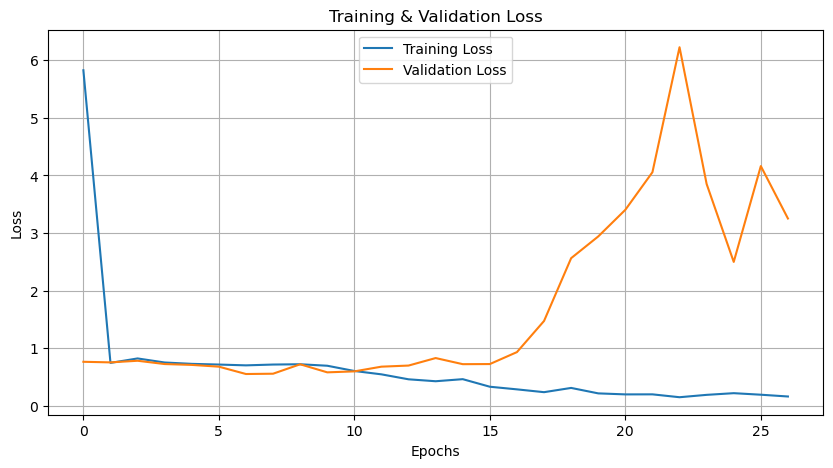

In [19]:
import matplotlib.pyplot as plt

# ✅ Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [29]:
def predict_multiple_json_skeleton(file_paths):
    results = {}

    for file_path in file_paths:
        try:
            # ✅ JSON 데이터 로드
            X_data, _ = load_json_skeleton(file_path)

            # ✅ 모델 예측
            prediction = stgcn_model.predict(X_data)
            
            # ✅ 예측 결과 처리
            predicted_class = np.argmax(prediction, axis=-1)[0]
            confidence = prediction[0][predicted_class]

            # ✅ 결과 저장
            if predicted_class == 0:
                results[file_path] = f"✅ 올바른 자세 ({confidence * 100:.2f}% 확신)"
            else:
                results[file_path] = f"❌ 잘못된 자세 감지 ({confidence * 100:.2f}% 확신)"

        except Exception as e:
            results[file_path] = f"❌ 예측 실패 (오류: {e})"

    return results



# ✅ 여러 개의 JSON 파일 리스트
file_paths = [
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-2-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-3-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-4-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-5-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-6-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-7-561.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-562.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-563.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-564.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-565.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-566.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-567.json",
    "D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-568.json",
]

# ✅ 예측 결과 얻기
prediction_results = predict_multiple_json_skeleton(file_paths)

# ✅ 결과 출력
for file, result in prediction_results.items():
    print(f"{file}: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-1-561.json: ✅ 올바른 자세 (66.93% 확신)
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-2-561.json: ✅ 올바른 자세 (61.21% 확신)
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-3-561.json: ✅ 올바른 자세 (69.01% 확신)
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-4-561.json: ✅ 올바른 자세 (69.68% 확신)
D:/Studying/gradu/013.피트니스자세/2.Validation/검증데이터/16/body_v-5-561.json: ✅ 올바른 자세 (55.63% 확신)
D:/Studying/

In [31]:
stgcn_model.save_weights("stgcn_model6.weights.h5")